
# Proyecto 1 de Diseño Lógico
# Implementación del algoritmo de Quine-McCluskey 


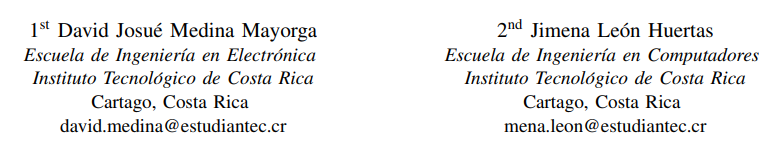


## Introducción

La minimización lógica puede convertirse en un proceso muy complicado. En las aplicaciones del diseño lógico se pueden ver impicadas funciones de pocas variables que se pueden analizar y minimizar utilizando métodos visuales como los mapas de Karnaugh, sin embargo, también se pueden encontrar funciones con múltiples variables más complejas que son imposibles de minimizar sin el uso de un algoritmo computacional.

En este proyecto se implementará el algoritmo tabular de Quine-McCluskey que consiste en encontrar todos los implicantes primos de la función booleana y seleccionar un conjunto mínimo de implicantes primos que cubra la función. Este algoritmo es exacto, esto quiere decir que se garantiza una minimización máxima de la función. 

Debido a la necesidad creciente de aumentar la densidad de los chips VLSI, se han descubierto métodos más efectivos para la minimización de funciones lógicas, por ejemplo, el algoritmo Espresso. Este algoritmo es un método heurístico, se reduce el tamaño de memoria y tiempo de ejecución, sin embargo, no garantiza una minimización máxima. A pesar de no minimizar la máximo, se encuentra una buena solución para hasta docenas de variables en un muy corto periodo. El algoritmo Espresso se utilizará para comparar el tiempo de ejecución con la implementación de Quine-McCluskey realizada.

## Código

In [2]:
#Librerias
from pyeda.inter import * 
import string

import time

### Algoritmo Quine-McCluskey

El algoritmo de Quine-McCluskey es un procedimiento tabular que parte del hecho de que una ecuación booleana está descrita por la suma de minterminos.

La implementación realizada lleva a cabo los siguientes pasos:

- Convertir cada mintermino de la función booleana por su equivalente en el sistema numérico binario.

- Agrupar minterminos por la cantidad de 1s en la representación binaria.

- Comparar cada número del mintermino en el grupo superior con cada mintermino del grupo inferior. Si entre dos números, cada posición es igual menos solo un dígito, se anota un número nuevo en otra tabla con la misma representación binaria pero con una x en el dígito que difieren. Asimismo, se le coloca de categoría la composición de los mintérminos que crean el nuevo elemento. En caso que un mintérmino no se puede emparejar con ningún otro de la tabla, este se retira y se marca como __implicante primo__.

- Se repite el paso 3 en la nueva tabla. Si se repiten los implicantes primos solamente se conseva uno.

- Se encuentran los implicantes primos escenciales, si un mintérmino solo es cubierto por un solo implicante primo, este es un __implicante esencial__.

- Los implicantes primos esenciales corresponden a la ecuación booleana reducida.

- Se reconstruyen los minterminos en la forma __ABC + ADE__.


In [3]:
def QNMin(vars,int_mints):
    
    """TRATAMIENTO DE ERRORES-----------------------------------------------------------------------------------------------
    Se parte del hecho de que si tenemos N variables, habra (2^N - 1) minterminos existentes en la tabla de verdad. Sin 
    embargo, para evitar errores posteriores se enviara un mensaje en caso de que el usuario no recuerde este detalle. """
    int_mints.sort()
    if int_mints[len(int_mints)-1] > 2**vars - 1:  #Si tengo 2 variables, el mintérmino mayor debe ser el 3ro = 11 bin
        print("Entradas invalidas ")
        exit()


    """ CONVERSION A BINARIO DE LOS MINTERMINOS ----------------------------------------------------------------------------
    Se usará la función bin() para convertir a binario cada mintermino (suponiendo que la tabla de verdad estaba ordenada 
    y cada minterm corresponde a su num en binario). Se ignora un prefijo que devuelve la función utilizada y luego se 
    rellena con ceros el num binario según la cantidad de variables especificada """
    int_bin_mints = {}
    for mint in int_mints:  #Añade binarios rellenados con N ceros (N = num de variables) en un diccionario
        int_bin_mints[mint] = bin(mint)[2:].zfill(vars) #{"2":  "00010"} ejemplo

    """AGRUPAMIENTO DE MINTERMINOS SEGUN CANTIDAD DE 1's -------------------------------------------------------------------
    Se clasifica a los minterms binarios segun su cantidad de unos y dicha informacion se guarda en un diccionario  
    (dict_grupos) que contiene una lista para cada agrupacion. No sabemos cuales agrupaciones hay, por lo tanto estas se 
    crean segun la informacion que se vaya obteniendo. De esta forma, el algoritmo va a servir para n variables y nos 
    ahorramos el tener que verificar si una agrupacion esta vacia o no. """
    conjuntos = {}
    for bin_mint in int_bin_mints.values():  #Contar 1's y añadir binarios en un nuevo diccionario
        try:
            conjuntos[bin_mint.count("1")].append(bin_mint)  #Añade al grupo existente
        except:
            conjuntos[bin_mint.count("1")] = [bin_mint]  #Crea nuevo grupo si antes no existía

    print("\nAgrupacion inicial: ", conjuntos.items()) #Imprimir mints binarios

    """ ENCONTRAR IMPLICANTES PRIMOS ---------------------------------------------------------------------------------------
    Se necesita comparar un mintermino perteneciente a una agrupacion con otro de una agrupacion superior de unos.
    Para esto, se evalua cada digito de ambos minterminos: primero se verifica que solo una posicion cambie entre ellos. 
    Posteriormente, se evalua cual posicion fue la que cambio, y se procede a poner un guión '-' en su lugar. Esta nueva 
    informacion se guarda en el mismo diccionario utilizado para agrupar segun cantidad de unos, pero se elimina su 
    contenido en cada iteración para así no tener que crear diccionarios a cada rato. Este algoritmo iterativo se detiene 
    cuando ya los minterminos tienen más de una diferencia. """
    backup = {}
    no_puedo_seguir_comparando = True
    agrup = 0
    mints_implic_primos = []
    todos_los_dict = []

    while True: # ALGORITMO PARA COMPARAR ITERATIVAMENTE
        #print("Estoy en el while")
        #print()

        # quiero comparar hasta que ya no se pueda = los bin_mints ya no se pueden comparar con los de los demas grupos
        # comparar =  ver si solo difieren en 1 digito (bit)
        backup = conjuntos.copy()
        conjuntos = {} #Diccionario se limpia para comparar cada vez
        no_puedo_seguir_comparando = True
        # para todos los bin_mints de todos los conjuntos: pero cuantos conjuntos hay actualmente?
        grupos_existentes = sorted(list(backup.keys()))
        largo_grupos_existentes = len(grupos_existentes) - 1

        # para saber cual agrupacion usar
        agrup = 0

        for grupo_actual in range(largo_grupos_existentes): # hacerlo para todos los grupos
            for mint_del_grupo1 in backup[grupos_existentes[grupo_actual]]: # elijo el grupo1
                for mint_del_grupo2 in backup[grupos_existentes[grupo_actual + 1]]: # elijo el grupo2

                    # evaluar diferencias
                    difiere = 0
                    for digito in range(len(mint_del_grupo1)):
                        if mint_del_grupo1[digito] != mint_del_grupo2[digito]:
                            difiere += 1
                            index_diferencia = digito

                    if difiere == 1: # añadir el implicante primo al diccionario de conjuntos
                        try:
                            conjuntos[agrup].append(str(mint_del_grupo1[:index_diferencia] + "-" + mint_del_grupo1[index_diferencia + 1:]))
                        except KeyError:
                            conjuntos[agrup] = [str(mint_del_grupo1[:index_diferencia] + "-" + mint_del_grupo1[index_diferencia + 1:])]

                        no_puedo_seguir_comparando = False

            agrup += 1

        #print("Conjuntos ", conjuntos)
        todos_los_dict.append(conjuntos)

        if no_puedo_seguir_comparando:
            break


    """OBTENER IMPLICANTES PRIMOS ESENCIALES--------------------------------------------------------------------------------
    Para saber cuales minterminos componen a los implicantes primos, se creo una funcion que devuelve una lista compuesta
    por estos minterminos en su representacion de int. Con estos datos, se cuentan las apariciones de cada mintermino, 
    para asi determinar que los implicantes primos esenciales son aquellos que solo aparecen una vez. """

    mints_sin_repeticion = set()

    def obtener_minterms_padres(mint_con_guiones): # Recibe un mintermino con guiones y devuelve los minterminos que lo componen
        num_de_guiones = mint_con_guiones.count('-')

        if num_de_guiones == 0:
            return [str(int(mint_con_guiones, 2))]

        permutaciones = [bin(num)[2:].zfill(num_de_guiones) for num in range(2**num_de_guiones)]
        mints_padres = []

        for num in range(2**num_de_guiones):
            mintPadre = mint_con_guiones[:]
            index = -1

            for digito in permutaciones[0]:
                #print("Permutacion ", permutaciones[0])
                if index != -1:
                    index = index + mintPadre[index + 1:].find('-') + 1
                else:
                    index = mintPadre[index + 1:].find('-')

                mintPadre = mintPadre[:index] + digito + mintPadre[index + 1:]

            int_mintPadre = str(int(mintPadre, 2))
            mints_padres.append(int_mintPadre)
            mints_sin_repeticion.add(int_mintPadre)

            permutaciones.pop(0)

        return mints_padres

    # RECONSTRUIR MINTERMINOS
    ultimo_dict = todos_los_dict[len(todos_los_dict)-2] #El ultimo diccionario util es el penultimo
    imp_prim = list(ultimo_dict.values()) #Lista de listas con los minterminos con guiones

    #Esta parte es para lidiar con algunos errores-------------------------------
    set_1D = set()
    for sub_lista in range(len(imp_prim)):
        for elem in imp_prim[sub_lista]:
            set_1D.add(elem)

    implicantes_primos = []
    for elem in set_1D:
        implicantes_primos.append(elem)
    #----------------------------------------------------------------------------

    print("Implicantes primos en binario ", implicantes_primos)

    for imp in range(len(implicantes_primos)): # para cada implicante primo en bin
        mints_implic_primos += [obtener_minterms_padres(implicantes_primos[imp])] #Obtencion de los ints

    print("Implicantes primos en int ", mints_implic_primos)

    #Hacer que la lista solo sea de una dimension
    list_mints_imp_primos = []

    for sub_lista in mints_implic_primos:
        list_mints_imp_primos += sub_lista

    #Contar apariciones de cada mintermino
    dict_apariciones = {}

    for mint in mints_sin_repeticion:
        dict_apariciones[mint] = list_mints_imp_primos.count(mint)
    print("Apariciones de cada imp. primo: ", dict_apariciones.items())

    #Crear lista de implicantes primos esenciales en formato int
    imp_esenciales = []

    for int_mint,apariciones in dict_apariciones.items():
        if apariciones == 1:
            imp_esenciales.append(int_mint)

    print(" \nImplicantes primos esenciales: ", imp_esenciales)

    """ RESPUESTA FINAL CON LETRAS USANDO LOS IMPLICANTES PRIMOS ESENCIALES-------------------------------------------------
    """
    #Usar los minterminos donde aparecen los impl. p. esenciales esta vez en formato binario con guiones
    respuesta = []
    for imp_esencial in imp_esenciales:
        for i in range(len(mints_implic_primos)):
            for j in mints_implic_primos[i]:
                if imp_esencial == j:
                    respuesta.append(implicantes_primos[i])

    print("Implicantes primos esenciales en binario: ", respuesta)

    #Traducir al alfabeto los impl.primos esenciales
    variable = 0
    funcion = " "
    encabezado = "F("
    usadas = set()
    letras = ["A","B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "Ñ", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

    for imp in range(len(respuesta)):
        for digito in respuesta[imp]:
            if digito == "0":
                funcion = funcion + letras[variable] + "'"
                usadas.add(letras[variable])
            if digito == "1":
                funcion = funcion + letras[variable]
                usadas.add(letras[variable])

            variable += 1
        variable = 0

        if imp != len(respuesta)-1:
            funcion = funcion + " + "

    largo = len(usadas)
    usadas_sorted = []

    for letra in usadas:
        usadas_sorted.append(letra)

    #Ordenamiento de letras para el encabezado
    usadas_sorted.sort()

    for letra in usadas_sorted:
        largo -= 1
        encabezado += letra

        if largo != 0:
            encabezado += ", "
        else:
            encabezado += ") = "

    stringFuncion = encabezado + funcion
    
       
    #Función Simplificada
    print("\nFUNCION SIMPLIFICADA POR QN:\n \n", stringFuncion)

    return 

In [3]:
#Implementación de Quine-McCluskey básica en consola 

""" SOLICITUD DE DATOS AL USUARIO --------------------------------------------------------------------------------------
"""
print()
int_mints = [int(mint) for mint in input("Suma de mintérminos ").split(",")]  #Genera lista con ints
vars = int(input("Cantidad de variables: "))

QNstart = time.perf_counter_ns()
QNMin(vars,int_mints)
QNend = time.perf_counter_ns()

#Registro de duración
QNduracion = QNend-QNstart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR QN: {QNduracion//1000}us")


Suma de mintérminos 1,2,5,7
Cantidad de variables: 3

Agrupacion inicial:  dict_items([(1, ['001', '010']), (2, ['101']), (3, ['111'])])
Implicantes primos en binario  ['-01', '1-1']
Implicantes primos en int  [['1', '5'], ['5', '7']]
Apariciones de cada imp. primo:  dict_items([('7', 1), ('5', 2), ('1', 1)])
 
Implicantes primos esenciales:  ['7', '1']
Implicantes primos esenciales en binario:  ['1-1', '-01']

FUNCION SIMPLIFICADA POR QN:
 
 F(A, B, C) =  AC + B'C

DURACIÓN DE LA MINIMIZACIÓN POR QN: 1722us


### Algoritmo Espresso

El algoritmo Espresso consiste en un ciclo de tres pasos que se iteran hasta no obtener mejora.

- Reducir
- Expandir
- Irredundancia 

__Expandir__ : consiste en incrementar el tamaño de cada implicante
- Así se cubren implicantes y se eliminan
- Se cambia un literal a "No importa"
- Se reduce el número de productos

__Reducir__: consiste en reducir el tamaño de un implicante
- Al combinarlo con una posterior expansión se logra una mejor cobertura

__Irredundancia__: consiste en eliminar los implicantes redundantes de la cobertura
- Se debe revisar que al eliminar un implicante la cobertura aún sea válida

La librería utilizada tiene la función de minimizar tablas de verdad, esto es muy pertinente ya que la entrada del usuario es la sumatoria de minterminos. En base a lo anterior, nace la necesidad de crear un arreglo de 1s y 0s que representen la salida o "columna Y" de la tabla de verdad antes de aplicar la minimización.





In [4]:
#FUNCIONES

"Se construye la dimensión de la columna Y de la tabla de verdad en función de la cantidad de variables escogidas"
def ConstruirY (num_variables): 
    
    Yvar = "0"  
    Yaux = ",0" 
    
    for i in range(1,(2**num_variables),1):
        Yvar = Yvar+Yaux
        
    return Yvar #Se retorna el string base de 2**n ceros


"Se construye la columna Y de la tabla de verdad en función de la suma de minterminos"
def ObtenerYtts (minterminos, Y): #Se recibe una lista de mintérminos y una "máscara" de la columna Y con 2**n ceros
    
    Y6var_lista = Y.split(",") 
    
    minTer = minterminos  
    minTer_int = list(map(int,  minTer))
    Y6var_int_list = list(map(int, Y6var_lista))
    
    for i in minTer_int :
        Y6var_int_list[i] = 1
    
    Y6var_int_list = list(map(str, Y6var_int_list))
    Ytts = "".join(Y6var_int_list)
   
    return Ytts #Se retorna la columna Y de la tabla de verdad 


"Minimización de tablas de verdad con el algoritmo Espresso"
def EspressoMin (num_variables,Ytts): #Se recibe la cantidad de variables y las salidas de la tabla de verdad
    
    X = ttvars('x', num_variables) #Se diferencian las variables de acuerdo a su posición
    fbool = truthtable(X,Ytts) #Se define la función booleana con las variables y la tabla de verdad
    fboolm = espresso_tts(fbool) #Se minimiza la función booleana
    
    return fboolm #Se retorna la función booleana minimizada

In [6]:
#Implementación de Espresso básica en consola 


#Se obtienen los datos del usuario
string_Minterms = input("Suma de minterminos:  ")
minterminos_Lista = string_Minterms.split(",")  # Con esto cada mintermino se mete en una lista

num_variables = int(input("Cantidad de variables: "))
print("\n") 


#Se construye las salidas de la tabla de verdad
Y = ConstruirY(num_variables) 

#Se implementa la minimización con Espresso
EsspStart = time.perf_counter_ns() 
print("\nFUNCION SIMPLIFICADA:\n \n",EspressoMin(num_variables, ObtenerYtts(minterminos_Lista,Y))) 
EsspEnd = time.perf_counter_ns()

#Registro de duración
EsspDuracion = EsspEnd-EsspStart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO: {EsspDuracion//1000}us")


Suma de minterminos:  1,2,5,7
Cantidad de variables: 3



FUNCION SIMPLIFICADA:
 
 (Or(And(x[0], ~x[1]), And(x[0], x[2]), And(~x[0], x[1], ~x[2])),)

DURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO: 2679us


## Comparación de los algoritmos

Se compara el rendimiento de ambos algoritmos para 4,5 y 6 variables

### Comparación para cuatro variables

In [7]:
string_Minterms = input("Suma de minterminos:  ")
minterminos_Lista = string_Minterms.split(",")  # Con esto cada mintermino se mete en una lista

int_mints = [int(mint) for mint in string_Minterms.split(",")]  #Genera lista con ints

num_variables = 4

print("\n") 


#QN

QNstart = time.perf_counter_ns()
QNMin(num_variables,int_mints)
QNend = time.perf_counter_ns()

QNduracion = QNend-QNstart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR QN: {QNduracion//1000}us")

print("\n")


#Espresso

Y = ConstruirY(num_variables) #Se construye las salidas de la tabla de verdad

EsspStart = time.perf_counter_ns()
print("\nFUNCION SIMPLIFICADA POR ESPRESSO:\n \n",EspressoMin(num_variables, ObtenerYtts(minterminos_Lista,Y))) #Se implementa la minimización con Espresso
EsspEnd = time.perf_counter_ns()

EsspDuracion = EsspEnd-EsspStart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO: {EsspDuracion//1000}us")

Suma de minterminos:  1,3,4,5,9,11,12,13,14,15



Agrupacion inicial:  dict_items([(1, ['0001', '0100']), (2, ['0011', '0101', '1001', '1100']), (3, ['1011', '1101', '1110']), (4, ['1111'])])
Implicantes primos en binario  ['--01', '-10-', '11--', '-0-1', '1--1']
Implicantes primos en int  [['1', '5', '9', '13'], ['4', '5', '12', '13'], ['12', '13', '14', '15'], ['1', '3', '9', '11'], ['9', '11', '13', '15']]
Apariciones de cada imp. primo:  dict_items([('13', 4), ('5', 2), ('14', 1), ('1', 2), ('12', 2), ('9', 3), ('3', 1), ('11', 2), ('4', 1), ('15', 2)])
 
Implicantes primos esenciales:  ['14', '3', '4']
Implicantes primos esenciales en binario:  ['11--', '-0-1', '-10-']

FUNCION SIMPLIFICADA POR QN:
 
 F(A, B, C, D) =  AB + B'D + BC'

DURACIÓN DE LA MINIMIZACIÓN POR QN: 982us



FUNCION SIMPLIFICADA POR ESPRESSO:
 
 (Or(And(x[0], ~x[2]), And(x[2], x[3]), And(~x[1], x[2])),)

DURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO: 613us


### Comparación para cinco variables

In [8]:
string_Minterms = input("Suma de minterminos:  ")
minterminos_Lista = string_Minterms.split(",")  # Con esto cada mintermino se mete en una lista

int_mints = [int(mint) for mint in string_Minterms.split(",")]  #Genera lista con ints

num_variables = 5

print("\n") 


#QN

QNstart = time.perf_counter_ns()
QNMin(num_variables,int_mints)
QNend = time.perf_counter_ns()

QNduracion = QNend-QNstart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR QN: {QNduracion//1000}us")

print("\n")

#Espresso

Y = ConstruirY(num_variables) #Se construye las salidas de la tabla de verdad

EsspStart = time.perf_counter_ns()
print("\nFUNCION SIMPLIFICADA POR ESPRESSO:\n \n",EspressoMin(num_variables, ObtenerYtts(minterminos_Lista,Y))) #Se implementa la minimización con Espresso
EsspEnd = time.perf_counter_ns()

#Registro de duración
EsspDuracion = EsspEnd-EsspStart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO:{EsspDuracion//1000}us")

Suma de minterminos:  1,3,4,5,9,11,12,13,14,15



Agrupacion inicial:  dict_items([(1, ['00001', '00100']), (2, ['00011', '00101', '01001', '01100']), (3, ['01011', '01101', '01110']), (4, ['01111'])])
Implicantes primos en binario  ['011--', '0-10-', '0--01', '01--1', '0-0-1']
Implicantes primos en int  [['12', '13', '14', '15'], ['4', '5', '12', '13'], ['1', '5', '9', '13'], ['9', '11', '13', '15'], ['1', '3', '9', '11']]
Apariciones de cada imp. primo:  dict_items([('13', 4), ('5', 2), ('14', 1), ('12', 2), ('1', 2), ('9', 3), ('11', 2), ('3', 1), ('4', 1), ('15', 2)])
 
Implicantes primos esenciales:  ['14', '3', '4']
Implicantes primos esenciales en binario:  ['011--', '0-0-1', '0-10-']

FUNCION SIMPLIFICADA POR QN:
 
 F(A, B, C, D, E) =  A'BC + A'C'E + A'CD'

DURACIÓN DE LA MINIMIZACIÓN POR QN: 1667us



FUNCION SIMPLIFICADA POR ESPRESSO:
 
 (Or(And(x[2], x[3], ~x[4]), And(~x[1], x[2], ~x[4]), And(x[0], ~x[2], ~x[4])),)

DURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO:889us


### Comparación para seis variables

In [5]:
string_Minterms = input("Suma de minterminos:  ")
minterminos_Lista = string_Minterms.split(",")  # Con esto cada mintermino se mete en una lista

int_mints = [int(mint) for mint in string_Minterms.split(",")]  #Genera lista con ints

num_variables = 6

print("\n") 


#QN

QNstart = time.perf_counter_ns()
QNMin(num_variables,int_mints)
QNend = time.perf_counter_ns()

QNduracion = QNend-QNstart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR QN: {QNduracion//1000}us")
print("\n")

#Espresso

Y = ConstruirY(num_variables) #Se construye las salidas de la tabla de verdad

EsspStart = time.perf_counter_ns()
print("\nFUNCION SIMPLIFICADA POR ESPRESSO:\n \n",EspressoMin(num_variables, ObtenerYtts(minterminos_Lista,Y))) #Se implementa la minimización con Espresso
EsspEnd = time.perf_counter_ns()

#Registro de duración
EsspDuracion = EsspEnd-EsspStart
print(f"\nDURACIÓN DE LA MINIMIZACIÓN POR ESPRESSO: {EsspDuracion//1000}us")

Suma de minterminos:  1,3,4,5,9,11,12,13,14,15



Agrupacion inicial:  dict_items([(1, ['000001', '000100']), (2, ['000011', '000101', '001001', '001100']), (3, ['001011', '001101', '001110']), (4, ['001111'])])
Implicantes primos en binario  ['00-10-', '001--1', '00--01', '00-0-1', '0011--']
Implicantes primos en int  [['4', '5', '12', '13'], ['9', '11', '13', '15'], ['1', '5', '9', '13'], ['1', '3', '9', '11'], ['12', '13', '14', '15']]
Apariciones de cada imp. primo:  dict_items([('5', 2), ('12', 2), ('4', 1), ('11', 2), ('15', 2), ('13', 4), ('3', 1), ('9', 3), ('1', 2), ('14', 1)])
 
Implicantes primos esenciales:  ['4', '3', '14']
Implicantes primos esenciales en binario:  ['00-10-', '00-0-1', '0011--']

FUNCION SIMPLIFICADA POR QN:
 
 F(A, B, C, D, E, F) =  A'B'DE' + A'B'D'F + A'B'CD

DURACIÓN DE LA MINIMIZACIÓN POR QN: 2390us



FUNCION SIMPLIFICADA POR ESPRESSO:
 
 (Or(And(x[0], ~x[2], ~x[4], ~x[5]), And(x[2], x[3], ~x[4], ~x[5]), And(~x[1], x[2], ~x[4], ~x[5])),)

DURACIÓN DE

### Referencias

- PyEDA https://pyeda.readthedocs.io/en/latest/
- Felipe Santiago Espinoza. Video demostrativo del algoritmo de Quine McCluskey. URL: https://www.youtube.com/watch?v=DTOzK88Inkk
- Synthesis of Digital Systems - IITD. Two-level Logic Optimisation. URL: https://www.youtube.com/watch?v=isqtQmWpDtg
- F. Wakerly. Diseño Digital: principios y prácticas. Pearson, México, 2001
